# Proyek Analisis Data: Bike Sharing Data
- **Nama:** Adelia Wahyu Suryandari
- **Email:** adeliaws16@gmail.com
- **ID Dicoding:** adeliawys

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren rata-rata peminjaman sepeda per jam atau per hari berdasarkan data yang ada?
- Pertanyaan 2: Bagaimana pengaruh pelanggan casual dan registered terhadap rata-rata peminjaman sepeda per hari dalam setiap season?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
day_df = pd.read_csv("day.csv", delimiter=",")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [6]:
day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terdapat kesalahan tipe data pada kolom **dteday**

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Terdapat kesalahan tipe data pada kolom **dteday**

In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [10]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [12]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [13]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

In [14]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [15]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [16]:
day_df.groupby(by="weekday").agg({
    "casual": ["nunique","sum","mean", "std"],
    "registered": ["nunique","sum","mean", "std"],
    "cnt": ["nunique","sum", "mean", "std"]
})

casual                                  registered          \
        nunique     sum         mean         std    nunique     sum   
weekday                                                               
0           104  140521  1338.295238  809.324777        103  303506   
1            98   70784   674.133333  493.777298        102  384719   
2            99   57843   556.182692  342.748705        104  411266   
3           101   57319   551.144231  401.808954        104  415729   
4            99   61460   590.961538  371.680307        104  423935   
5            99   78238   752.288462  483.422400        103  409552   
6           103  153852  1465.257143  927.082884        105  323955   

                                      cnt                                    
                mean          std nunique     sum         mean          std  
weekday                                                                      
0        2890.533333  1179.713036     104  444027  4228.828571  1872.496629  
1        3663.990476  1504.215925     104  455503  4338.123810  1793.074013  
2        3954.480769  1549.462149     104  469109  4510.663462  1826.911642  
3        3997.394231  1723.710208     103  473048  4548.538462  2038.095884  
4        4076.298077  1642.753330     103  485395  4667.259615  1939.433317  
5        3938.000000  1494.998698     104  487790  4690.288462  1874.624870  
6        3085.285714  1358.068784     102  477807  4550.542857  2196.693009

In [17]:
hour_df[["casual","registered"]].sum()

casual         620017
registered    2672662
dtype: int64

## Visualization & Explanatory Analysis

### 1. Bagaimana tren rata-rata peminjaman sepeda per hari berdasarkan data yang ada?

















In [22]:
#Trend Harian
trend_harian = day_df.groupby('dteday')['cnt'].mean()

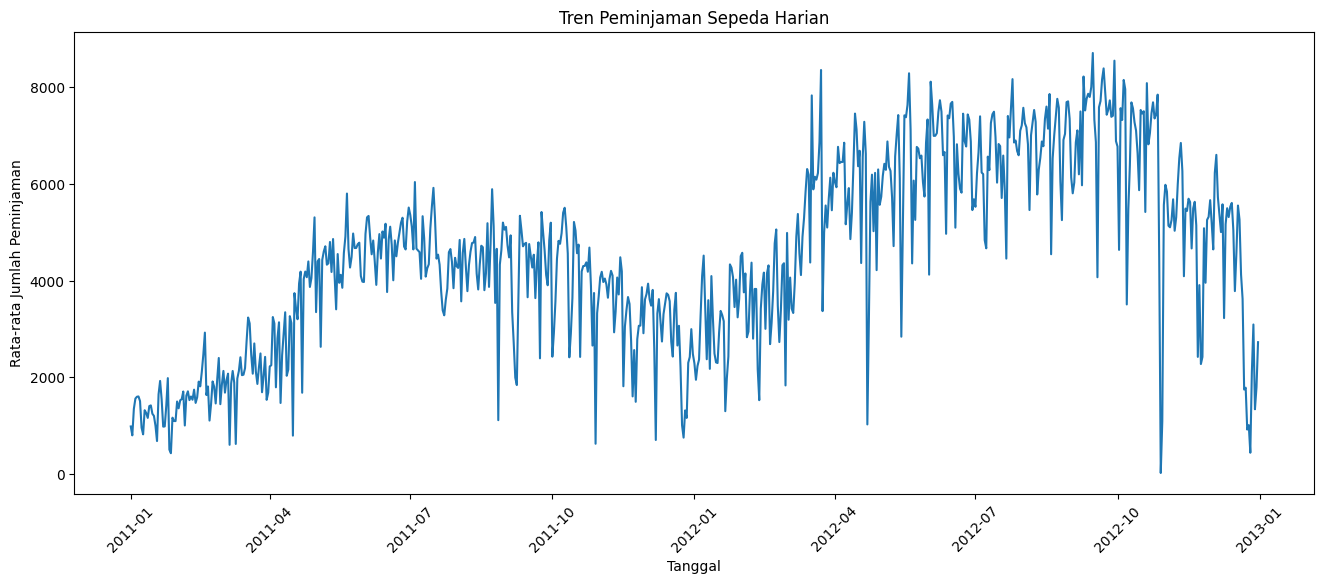

In [23]:
plt.figure(figsize=(16, 6))
sns.lineplot(x=trend_harian.index, y=trend_harian.values)
plt.title('Tren Peminjaman Sepeda Harian')
plt.xlabel('Tanggal')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(rotation=45)
plt.show()

Tren Harian

*   Grafik "Tren Peminjaman Sepeda Harian" menggambarkan jumlah rata-rata peminjaman untuk setiap hari selama periode yang dicatat.
*   Puncak pada grafik menandakan hari-hari dengan jumlah rata-rata peminjaman tertinggi yang menunjukkan hari-hari puncak.
*   Dengan memeriksa grafik, kita dapat mengidentifikasi tanggal-tanggal (hari-hari) tertentu di mana peminjaman sepeda mencapai puncak.


### 2. Bagaimana pengaruh pelanggan casual dan registered terhadap rata-rata peminjaman sepeda per hari dalam setiap season?

In [18]:
seasonal_avg = day_df.groupby(['season', 'dteday'])[['casual', 'registered', 'cnt']].mean().reset_index()

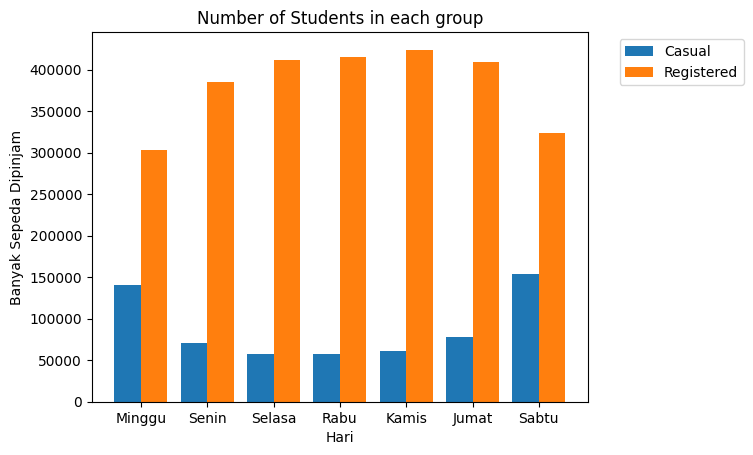

In [25]:
#Visualisasi pelanggan casual dan registered per hari
import numpy as np
import matplotlib.pyplot as plt

hari = ('Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis',
          'Jumat','Sabtu')
Casual = day_df.groupby(by="weekday").casual.sum()
Registered = day_df.groupby(by="weekday").registered.sum()

X_axis = np.arange(len(hari))

plt.bar(X_axis - 0.2, Casual, 0.4, label = 'Casual')
plt.bar(X_axis + 0.2, Registered, 0.4, label = 'Registered')

plt.xticks(X_axis, hari)
plt.xlabel("Hari")
plt.ylabel("Banyak Sepeda Dipinjam")
plt.title("Number of Students in each group")
plt.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left')
plt.show()


Dapat dilihat bahwa peminjam registered sebanyak 81,2% dari seluruh peminjam sepeda. Sedangkan peminjam casual sebanyak 18,2%.

In [19]:
# Visualisasi pengaruh pelanggan casual dan registered
plt.figure(figsize=(16, 8))

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

Text(0.5, 1.0, 'Pengaruh Pelanggan Casual terhadap Rata-rata Peminjaman Sepeda per Hari')

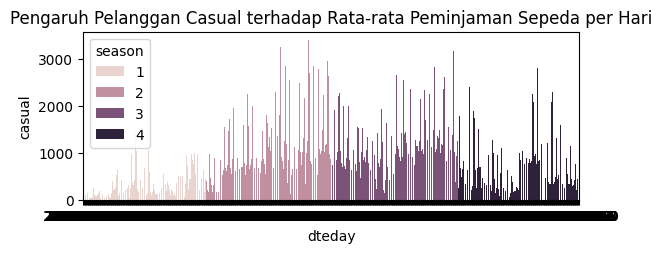

In [20]:
# Casual Users
plt.subplot(2, 1, 1)
sns.barplot(x='dteday', y='casual', hue='season', data=seasonal_avg)
plt.title('Pengaruh Pelanggan Casual terhadap Rata-rata Peminjaman Sepeda per Hari')

Warna yang berbeda pada setiap musim mempermudah pemahaman perbedaan dalam pengaruh pelanggan casual dan registered

Text(0.5, 1.0, 'Pengaruh Pelanggan Registered terhadap Rata-rata Peminjaman Sepeda per Hari')

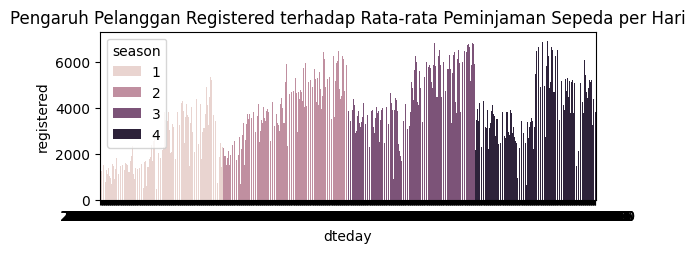

In [ ]:
# Registered Users
plt.subplot(2, 1, 2)
sns.barplot(x='dteday', y='registered', hue='season', data=seasonal_avg)
plt.title('Pengaruh Pelanggan Registered terhadap Rata-rata Peminjaman Sepeda per Hari')

Warna yang berbeda pada setiap musim mempermudah pemahaman perbedaan dalam pengaruh pelanggan casual dan registered

Interpretasi:
*   Grafik-bar "Pengaruh Pelanggan Casual terhadap Rata-rata Peminjaman Sepeda per Hari" menunjukkan rata-rata peminjaman sepeda pelanggan casual per hari dalam setiap musim.
*   Grafik-bar "Pengaruh Pelanggan Registered terhadap Rata-rata Peminjaman Sepeda per Hari" menunjukkan rata-rata peminjaman sepeda pelanggan registered per hari dalam setiap musim.





## Conclusion

- Conclution pertanyaan 1

Analisis ini dapat membantu kita secara tepat menentukan kapan peminjaman sepeda mencapai puncaknya dalam skala harian. Pada kasus ini diperoleh puncak peminjaman sepeda pada season ke-2 dan 4. Promosi selama waktu-waktu puncak tersebut dapat dipertimbangkan untuk memaksimalkan peminjaman sepeda. Pada season ke-1 peminjam sepeda cenderung sedikit.

- Conclution pertanyaan 2

Berdasarkan analisis ini kita dapat melihat bahwa pelanggan registered melakukan peminjaman sepeda lebih sering dan konsisten dibandingkan pelanggan casual. Oleh karena itu, meningkatkan dan mempertahankan pelanggan registered dengan berbagai penawaran menarik dapat dipertimbangkan untuk memaksimalkan peminjaman sepeda.